In [6]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

csvpath = "Resources\CensusData.csv"

sales_df = pd.DataFrame(pd.read_csv(csvpath))
sales_df

,Year,United States,South,West
0,1963,560,199,141
1,1964,565,200,129
2,1965,575,210,129
3,1966,461,166,99
4,1967,487,179,119
5,1968,490,177,121
6,1969,448,175,114
7,1970,485,203,121
8,1971,656,270,176
9,1972,718,305,187


In [7]:
csvpath2= "Resources\FedData.csv"
rate_df = pd.DataFrame(pd.read_csv(csvpath2))
rate_df
eff_fed_rate= rate_df.groupby(["Year"]).mean()['Effective Federal Funds Rate'].round(2)
eff_fed_rate_df = pd.DataFrame(eff_fed_rate)
eff_fed_rate_df = eff_fed_rate_df.drop([1954,1955,1956,1957,1958,1959,1960,1961,1962])
eff_fed_rate_df

,Effective Federal Funds Rate
Year,
1963,3.18
1964,3.50
1965,4.07
1966,5.11
1967,4.22
1968,5.66
1969,8.20
1970,7.18
1971,4.66


In [5]:
sales_fed_funds_df = pd.merge(sales_df,eff_fed_rate_df, on="Year", how="outer")
sales_fed_funds_df=sales_fed_funds_df.rename(index=str, columns={"Effective Federal Funds Rate":"Fed Funds Rate"})
sales_fed_funds_df

,Year,United States,South,West,Fed Funds Rate
0,1963,560,199,141,3.18
1,1964,565,200,129,3.50
2,1965,575,210,129,4.07
3,1966,461,166,99,5.11
4,1967,487,179,119,4.22
5,1968,490,177,121,5.66
6,1969,448,175,114,8.20
7,1970,485,203,121,7.18
8,1971,656,270,176,4.66
9,1972,718,305,187,4.43


<IPython.core.display.Javascript object>


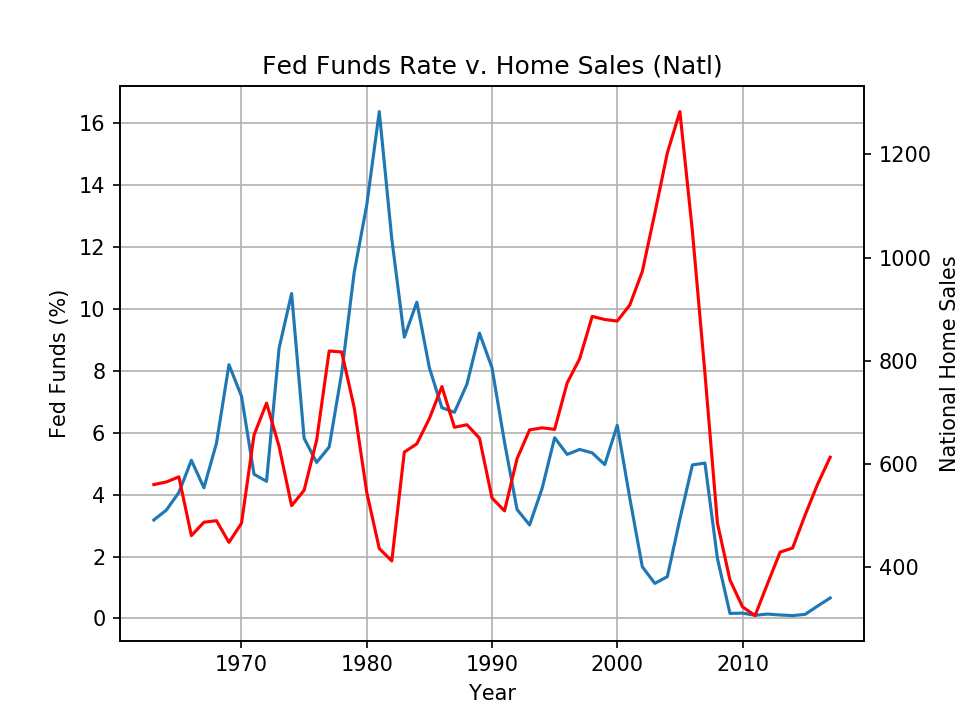

In [8]:
home_sales=[]
for sale in sales_fed_funds_df["United States"]:
    int_sale=int(sale)
    home_sales.append(int_sale)
fig, ax1=plt.subplots()
x=np.arange(1963,2018)
n=sales_fed_funds_df['Fed Funds Rate']
ax1.plot(x,n)
ax2=ax1.twinx()
ax2.plot(x,home_sales,color="r")
ax1.grid()
ax1.set_title('Fed Funds Rate v. Home Sales (Natl)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Fed Funds (%)')
ax2.set_ylabel('National Home Sales')
plt.savefig('Graph Images/Fed_Funds_Home_Sales.png')